In [1]:
import matplotlib.pyplot as plt
import numpy as np
from proj1_helpers import *
from implement import *
from cross_validation import *

DATA_FOLDER = 'data'
DATA_TRAIN_PATH = '../data/train.csv'


y, tX, ids = load_csv_data(DATA_TRAIN_PATH)




In [2]:
ind_DER_mass_MMC = 0
ind_DER_mass_transverse_met_lep = 1
ind_DER_mass_vis = 2
ind_DER_pt_h   = 3
ind_DER_deltaeta_jet_jet = 4
ind_DER_mass_jet_jet = 5
ind_DER_prodeta_jet_jet = 6
ind_DER_deltar_tau_lep = 7
ind_DER_pt_tot   = 8
ind_DER_sum_pt   = 9
ind_DER_pt_ratio_lep_tau   = 10
ind_DER_met_phi_centrality   = 11
ind_DER_lep_eta_centrality   = 12
ind_PRI_tau_pt   = 13
ind_PRI_tau_eta   = 14
ind_PRI_tau_phi   = 15
ind_PRI_lep_pt   = 16
ind_PRI_lep_eta = 17
ind_PRI_lep_phi = 18
ind_PRI_met   = 19
ind_PRI_met_phi   = 20
ind_PRI_met_sumet   = 21
ind_PRI_jet_num   = 22
ind_PRI_jet_leading_pt   = 23
ind_PRI_jet_leading_eta   = 24
ind_PRI_jet_leading_phi   = 25
ind_PRI_jet_subleading_pt   = 26
ind_PRI_jet_subleading_eta   = 27
ind_PRI_jet_subleading_phi   = 28
ind_PRI_jet_all_pt   = 29



Step 1 : Correct the values for different jet_num = 0,1,2-3 // All the values in DER_mass_MMC = -999.000
We correct them by extracting the correct values in this column (which is DER_mass_MMC)
And train a model to predict the value of this column using the values from the other parameters

DER_mass_MMC  : 7562  nb -999.000 values

Task 1 from this step : Extract and store in proper way, in order to have a 
- 'y' vector containing the right values of DER_mass_MMC
- 'x' matrix containing the others columns from the right values of DER_mass_MMC (associated to y)
- 'wrongX_topredict' containing the parameters from the wrong values of DER_mass_MMC 

We will then train the model using y and x, and then compute this trained model with wrongX_topredict in order to have some approx. correct values and replace all the -999.000


We need to remove :
- DER_deltaeta_jet_jet : 77544/77544 wrong 
- DER_mass_jet_jet  : 77544/77544
- DER_prodeta_jet_jet  : 77544/77544
- DER_lep_eta_centrality  : 77544/77544 wrong 

- PRI_jet_subleading_pt  : 77544/77544 wrong 
- PRI_jet_subleading_eta  : 77544/77544 wrong 
- PRI_jet_subleading_phi  : 77544/77544 wrong 

In [3]:
# Extract indices from dataset only jet_num = 0 // ravel() is used to transform into a single vector the indices
ind_jet0 = np.argwhere((tX[:,ind_PRI_jet_num] == 0)).ravel()
# Extract indices from dataset only jet_num = 3 // ravel() is used to transform into a single vector the indices
ind_jet1 = np.argwhere((tX[:,ind_PRI_jet_num] == 1)).ravel()
# Extract indices from dataset only jet_num = 3 or 2// ravel() is used to transform into a single vector the indices
ind_jet2 = np.argwhere((tX[:,ind_PRI_jet_num] == 2) | (tX[:,ind_PRI_jet_num] == 3)).ravel()

# Create new dataset extracting only jet_num = 0
datajet0 = tX[ind_jet0]
colToDelete_jet0 = [ind_PRI_jet_num,ind_DER_deltaeta_jet_jet, ind_DER_mass_jet_jet, ind_DER_prodeta_jet_jet, ind_DER_lep_eta_centrality, ind_PRI_jet_subleading_pt, ind_PRI_jet_subleading_eta, ind_PRI_jet_subleading_phi, ind_PRI_jet_leading_pt, ind_PRI_jet_leading_eta, ind_PRI_jet_leading_phi, ind_PRI_jet_all_pt]     
datajet0 = np.delete(datajet0, colToDelete_jet0 , axis=1)
# Create new dataset extracting only jet_num = 1
datajet1 = tX[ind_jet1]
colToDelete_jet1 = [ind_PRI_jet_num,ind_DER_deltaeta_jet_jet, ind_DER_mass_jet_jet, ind_DER_prodeta_jet_jet, ind_DER_lep_eta_centrality, ind_PRI_jet_subleading_pt, ind_PRI_jet_subleading_eta, ind_PRI_jet_subleading_phi, ind_PRI_jet_all_pt ]     
datajet1 = np.delete(datajet1, colToDelete_jet1 , axis=1)
# Create new dataset extracting only jet_num = 2 or 3
datajet2 = tX[ind_jet2]
colToDelete_jet2 = [ind_PRI_jet_num]    
datajet2 = np.delete(datajet2, colToDelete_jet2 , axis=1)



In [4]:
# Now we want to extract and correct -999.000 values from DER_mass_MMC

# Extract indices where the wrong value of DER_mass_MMC == -999.000 // We want to correct/predict these values
ind_wrongjet0 = np.argwhere(datajet0[:,ind_DER_mass_MMC] == -999.000).ravel()
ind_wrongjet1 = np.argwhere(datajet1[:,ind_DER_mass_MMC] == -999.000).ravel()
ind_wrongjet2 = np.argwhere(datajet2[:,ind_DER_mass_MMC] == -999.000).ravel()


# Extract indices where the values of DER_mass_MMC are correct // We will train from these datas
ind_rightjet0 = np.argwhere(datajet0[:,ind_DER_mass_MMC] != -999.000).ravel()
ind_rightjet1 = np.argwhere(datajet1[:,ind_DER_mass_MMC] != -999.000).ravel()
ind_rightjet2 = np.argwhere(datajet2[:,ind_DER_mass_MMC] != -999.000).ravel()

# Extract data DER_mass_MMC only wrong values
wrongjet0 = datajet0[ind_wrongjet0]
wrongjet1 = datajet1[ind_wrongjet1]
wrongjet2 = datajet2[ind_wrongjet2]


#Create the data that will compute the predicted y (DER_mass_MMC)
tx_wrongjet0 = np.delete(wrongjet0, ind_DER_mass_MMC, axis=1)
tx_wrongjet1 = np.delete(wrongjet1, ind_DER_mass_MMC, axis=1)
tx_wrongjet2 = np.delete(wrongjet2, ind_DER_mass_MMC, axis=1)


# Extract data DER_mass_MMC only correct values
rightjet0 = datajet0[ind_rightjet0]
rightjet1 = datajet1[ind_rightjet1]
rightjet2 = datajet2[ind_rightjet2]


#Now we'll extract the DER_mass_MMC column and turn it into a 'y' vector sample,
# The others columns will be the 'X' data samples
# Jet = 0
y_rightjet0 = rightjet0[:, ind_DER_mass_MMC]
tx_rightjet0 = np.delete(rightjet0, ind_DER_mass_MMC, axis=1)
# Jet = 1
y_rightjet1 = rightjet1[:, ind_DER_mass_MMC]
tx_rightjet1 = np.delete(rightjet1, ind_DER_mass_MMC, axis=1)
#JEt = 2,3
y_rightjet2 = rightjet2[:, ind_DER_mass_MMC]
tx_rightjet2 = np.delete(rightjet2, ind_DER_mass_MMC, axis=1)

__Train Model__
>Jet Num = 0

In [5]:
# Process X of jet0 (DET_mass_MMC)
tx_rightjet0_poly = build_poly(tx_rightjet0, 2, False)
tx_rightjet0_poly,mean_txjet0,std_txjet0 = standardize(tx_rightjet0_poly)
tx_rightjet0_poly[:,0] = np.ones(len(tx_rightjet0_poly)) ####### ADD to FUNCTION

# Process Y of jet0 (DET_mass_MMC)
stand_y_rightjet0,mean_yjet0,std_yjet0 = standardize(y_rightjet0)

# Train/Compute the Model for Jet = 0
loss_jet0, w_jet0 = ridge_regression(stand_y_rightjet0, tx_rightjet0_poly, 0.00001)

y_pred_jet0 = tx_rightjet0_poly.dot(w_jet0)

>Jet Num = 1

In [6]:
# Process Y of jet1 (DET_mass_MMC)
tx_rightjet1_poly = build_poly(tx_rightjet1, 1, False)
tx_rightjet1_poly,mean_txjet1,std_txjet1 = standardize(tx_rightjet1_poly)
tx_rightjet1_poly[:,0] = np.ones(len(tx_rightjet1_poly)) ####### ADD to FUNCTION

# Process Y of jet1 (DET_mass_MMC)
stand_y_rightjet1,mean_yjet1,std_yjet1 = standardize(y_rightjet1)

# Train/Compute the Model for Jet = 1
loss_jet0, w_jet1 = ridge_regression(stand_y_rightjet1, tx_rightjet1_poly, 0.00001)

y_pred_jet1 = tx_rightjet1_poly.dot(w_jet1)

>Jet Num = 2-3

In [7]:
# Process Y of jet2-3 (DET_mass_MMC)
tx_rightjet2_poly = build_poly(tx_rightjet2, 1, False)
tx_rightjet2_poly,mean_txjet23,std_txjet23 = standardize(tx_rightjet2_poly)
tx_rightjet2_poly[:,0] = np.ones(len(tx_rightjet2_poly)) ####### ADD to FUNCTION

# Process Y of jet2-3 (DET_mass_MMC)
testy_rightjet2,mean_yjet2,std_yjet2 = standardize(y_rightjet2)

# Train/Compute the Model for Jet = 2-3
loss_jet2, w_jet2 = ridge_regression(testy_rightjet2, tx_rightjet2_poly, 0.00001)

y_pred_jet2 = tx_rightjet2_poly.dot(w_jet2)

The model is trained so we will now compute/predict the values for the wrong ones.

In [8]:
tx_wrongjet0_poly = build_poly(tx_wrongjet0, 2, False)
tx_wrongjet0_poly,_,_ = standardize(tx_wrongjet0_poly,mean_txjet0,std_txjet0)
tx_wrongjet0_poly[:,0] = np.ones(len(tx_wrongjet0_poly)) ####### ADD to FUNCTION

y_predMASS_jet0 = tx_wrongjet0_poly.dot(w_jet0)
y_predMASS_jet0 = (y_predMASS_jet0*std_yjet0) + mean_yjet0

In [9]:
tx_wrongjet1_poly = build_poly(tx_wrongjet1, 1, False)
tx_wrongjet1_poly,_,_ = standardize(tx_wrongjet1_poly, mean_txjet1, std_txjet1)
tx_wrongjet1_poly[:,0] = np.ones(len(tx_wrongjet1_poly)) ####### ADD to FUNCTION

y_predMASS_jet1 = tx_wrongjet1_poly.dot(w_jet1)
y_predMASS_jet1 = (y_predMASS_jet1*std_yjet1) + mean_yjet1

In [10]:
tx_wrongjet2_poly = build_poly(tx_wrongjet2, 1, False)
tx_wrongjet2_poly,_,_ = standardize(tx_wrongjet2_poly,mean_txjet23,std_txjet23)
tx_wrongjet2_poly[:,0] = np.ones(len(tx_wrongjet2_poly)) ####### ADD to FUNCTION

y_predMASS_jet2 = tx_wrongjet2_poly.dot(w_jet2)

y_predMASS_jet2 = (y_predMASS_jet2*std_yjet2) + mean_yjet2

We will now correct the initial dataset.

In [11]:
wrongjet0[:, ind_DER_mass_MMC] = y_predMASS_jet0
datajet0[ind_wrongjet0] = wrongjet0

wrongjet1[:, ind_DER_mass_MMC] = y_predMASS_jet1
datajet1[ind_wrongjet1] = wrongjet1

wrongjet2[:, ind_DER_mass_MMC] = y_predMASS_jet2
datajet2[ind_wrongjet2] = wrongjet2

In [12]:
y_jet0 = y[ind_jet0]
y_jet1 = y[ind_jet1]
y_jet2 = y[ind_jet2]

In [13]:
datajet0_poly = build_poly(datajet0, 7, True)
datajet0_poly,mean_txj0,std_txj0 = standardize(datajet0_poly)
datajet0_poly[:,0] = np.ones(len(datajet0_poly)) ####### ADD to FUNCTION

datajet1_poly = build_poly(datajet1, 8, True)
datajet1_poly,mean_txj1,std_txj1 = standardize(datajet1_poly)
datajet1_poly[:,0] = np.ones(len(datajet1_poly)) ####### ADD to FUNCTION

datajet2_poly = build_poly(datajet2, 8, True)
datajet2_poly,mean_txj2,std_txj2 = standardize(datajet2_poly)
datajet2_poly[:,0] = np.ones(len(datajet2_poly)) ####### ADD to FUNCTION

loss_j0, w_pred_jet0 = ridge_regression(y_jet0, datajet0_poly, 0.00001)
print(loss_j0)

loss_j1, w_pred_jet1 = ridge_regression(y_jet1, datajet1_poly, 0.00001)
print(loss_j1)

loss_j2, w_pred_jet2 = ridge_regression(y_jet2, datajet2_poly, 0.00001)
print(loss_j2)

0.24110516426879072
0.31767693085615656
0.30156530082655225


__Test the models on training set__

In [14]:
y_predj0 = predict_labels(w_pred_jet0, datajet0_poly)

result = np.sum(y_predj0 == y_jet0)

print("Final result : " + str(result/y_jet0.shape[0]))

Final result : 0.8335051494800476


In [15]:
y_predj1 = predict_labels(w_pred_jet1, datajet1_poly)

result = np.sum(y_predj1 == y_jet1)

print("Final result : " + str(result/y_jet1.shape[0]))

Final result : 0.7798153306509853


In [16]:
y_predj2 = predict_labels(w_pred_jet2, datajet2_poly)

result = np.sum(y_predj2 == y_jet2)

print("Final result : " + str(result/y_jet2.shape[0]))

Final result : 0.7998428518258136


__----------------------- DATA CLEANED AND TRAINED ----------------------__

__TEST DATA__

In [17]:
DATA_TEST_PATH = '../data/test.csv'


y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


In [18]:
tX_test.shape

(568238, 30)

In [19]:
def extract_jet_indices(tX, ind_PRI_jet_num):
    # Extract indices from dataset only jet_num = 0 // ravel() is used to transform into a single vector the indices
    ind_testjet0 = np.argwhere((tX[:,ind_PRI_jet_num] == 0)).ravel()
    # Extract indices from dataset only jet_num = 3 // ravel() is used to transform into a single vector the indices
    ind_testjet1 = np.argwhere((tX[:,ind_PRI_jet_num] == 1)).ravel()
    # Extract indices from dataset only jet_num = 3 or 2// ravel() is used to transform into a single vector the indices
    ind_testjet2 = np.argwhere((tX[:,ind_PRI_jet_num] == 2) | (tX[:,ind_PRI_jet_num] == 3)).ravel()
    
    return ind_testjet0, ind_testjet1, ind_testjet2

We will extract data with -999.000 values from the data test set to correct them.

In [20]:
# Extract indices from dataset only jet_num = 0 // ravel() is used to transform into a single vector the indices
ind_testjet0,ind_testjet1,ind_testjet2 = extract_jet_indices(tX_test, ind_PRI_jet_num)

# Create new dataset extracting only jet_num = 0
datatest_jet0 = tX_test[ind_testjet0]
colToDeltest_jet0 = [ind_PRI_jet_num,ind_DER_deltaeta_jet_jet, ind_DER_mass_jet_jet, ind_DER_prodeta_jet_jet, ind_DER_lep_eta_centrality, ind_PRI_jet_subleading_pt, ind_PRI_jet_subleading_eta, ind_PRI_jet_subleading_phi, ind_PRI_jet_leading_pt, ind_PRI_jet_leading_eta, ind_PRI_jet_leading_phi, ind_PRI_jet_all_pt]     
datatest_jet0 = np.delete(datatest_jet0, colToDeltest_jet0 , axis=1)
# Create new dataset extracting only jet_num = 1
datatest_jet1 = tX_test[ind_testjet1]
colToDeltest_jet1 = [ind_PRI_jet_num,ind_DER_deltaeta_jet_jet, ind_DER_mass_jet_jet, ind_DER_prodeta_jet_jet, ind_DER_lep_eta_centrality, ind_PRI_jet_subleading_pt, ind_PRI_jet_subleading_eta, ind_PRI_jet_subleading_phi, ind_PRI_jet_all_pt ]     
datatest_jet1 = np.delete(datatest_jet1, colToDeltest_jet1 , axis=1)
# Create new dataset extracting only jet_num = 2 or 3
datatest_jet2 = tX_test[ind_testjet2]
colToDeltest_jet2 = [ind_PRI_jet_num]    
datatest_jet2 = np.delete(datatest_jet2, colToDeltest_jet2 , axis=1)

print(datatest_jet0.shape)
print(datatest_jet1.shape)
print(datatest_jet2.shape)

(227458, 18)
(175338, 21)
(165442, 29)


In [21]:
# Extract indices where the wrong value of DER_mass_MMC == -999.000 // We want to correct/predict these values
indtest_wrongjet0 = np.argwhere(datatest_jet0[:,ind_DER_mass_MMC] == -999.000).ravel()
indtest_wrongjet1 = np.argwhere(datatest_jet1[:,ind_DER_mass_MMC] == -999.000).ravel()
indtest_wrongjet2 = np.argwhere(datatest_jet2[:,ind_DER_mass_MMC] == -999.000).ravel()

# Extract data DER_mass_MMC only wrong values
wrongtest_jet0 = datatest_jet0[indtest_wrongjet0]
wrongtest_jet1 = datatest_jet1[indtest_wrongjet1]
wrongtest_jet2 = datatest_jet2[indtest_wrongjet2]


#Create the data that will compute the predicted y (DER_mass_MMC)
txtest_wrongjet0 = np.delete(wrongtest_jet0, ind_DER_mass_MMC, axis=1)
txtest_wrongjet1 = np.delete(wrongtest_jet1, ind_DER_mass_MMC, axis=1)
txtest_wrongjet2 = np.delete(wrongtest_jet2, ind_DER_mass_MMC, axis=1)



[     9     46     53 ... 165386 165427 165436]


(59263,)
(17243,)
(9982,)


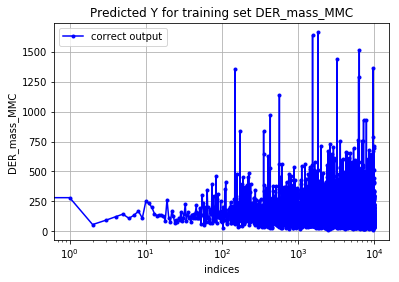

In [28]:
txtest_wrongjet0_poly = build_poly(txtest_wrongjet0, 2, False)
txtest_wrongjet0_poly,_,_ = standardize(txtest_wrongjet0_poly,mean_txjet0,std_txjet0)
txtest_wrongjet0_poly[:,0] = np.ones(len(txtest_wrongjet0_poly)) ####### ADD to FUNCTION

MASSpred_test_jet0 = txtest_wrongjet0_poly.dot(w_jet0)
MASSpred_test_jet0 = (MASSpred_test_jet0*std_yjet0) + mean_yjet0


txtest_wrongjet1_poly = build_poly(txtest_wrongjet1, 1, False)
txtest_wrongjet1_poly,_,_ = standardize(txtest_wrongjet1_poly, mean_txjet1, std_txjet1)
txtest_wrongjet1_poly[:,0] = np.ones(len(txtest_wrongjet1_poly)) ####### ADD to FUNCTION

MASSpred_test_jet1 = txtest_wrongjet1_poly.dot(w_jet1)
MASSpred_test_jet1 = (MASSpred_test_jet1*std_yjet1) + mean_yjet1


txtest_wrongjet2_poly = build_poly(txtest_wrongjet2, 1, False)
txtest_wrongjet2_poly,_,_ = standardize(txtest_wrongjet2_poly, mean_txjet23, std_txjet23)
txtest_wrongjet2_poly[:,0] = np.ones(len(txtest_wrongjet2_poly)) ####### ADD to FUNCTION

MASSpred_test_jet2 = txtest_wrongjet2_poly.dot(w_jet2)
MASSpred_test_jet2 = (MASSpred_test_jet2*std_yjet1) + mean_yjet2

In [23]:
wrongtest_jet0[:, ind_DER_mass_MMC] = MASSpred_test_jet0
datatest_jet0[indtest_wrongjet0] = wrongtest_jet0

wrongtest_jet1[:, ind_DER_mass_MMC] = MASSpred_test_jet1
datatest_jet1[indtest_wrongjet1] = wrongtest_jet1

wrongtest_jet2[:, ind_DER_mass_MMC] = MASSpred_test_jet2
datatest_jet2[indtest_wrongjet2] = wrongtest_jet2

In [24]:
datatestjet0_poly = build_poly(datatest_jet0, 7, True)
datatestjet0_poly,_,_ = standardize(datatestjet0_poly,mean_txj0,std_txj0)
datatestjet0_poly[:,0] = np.ones(len(datatestjet0_poly)) ####### ADD to FUNCTION

datatestjet1_poly = build_poly(datatest_jet1, 8, True)
datatestjet1_poly,_,_ = standardize(datatestjet1_poly,mean_txj1, std_txj1)
datatestjet1_poly[:,0] = np.ones(len(datatestjet1_poly)) ####### ADD to FUNCTION

datatestjet2_poly = build_poly(datatest_jet2, 8, True)
datatestjet2_poly,_,_ = standardize(datatestjet2_poly, mean_txj2, std_txj2)
datatestjet2_poly[:,0] = np.ones(len(datatestjet2_poly)) ####### ADD to FUNCTION

ytest_predj0 = predict_labels(w_pred_jet0, datatestjet0_poly)

ytest_predj1 = predict_labels(w_pred_jet1, datatestjet1_poly)

ytest_predj2 = predict_labels(w_pred_jet2, datatestjet2_poly)



(227458,)
(175338,)
(165442,)


In [33]:
y_result = np.ones(tX_test.shape[0])*2

In [36]:
y_result[ind_testjet0] = ytest_predj0
y_result[ind_testjet1] = ytest_predj1
y_result[ind_testjet2] = ytest_predj2

In [37]:
y_result

array([-1., -1., -1., ...,  1., -1., -1.])

In [40]:
create_csv_submission(ids_test, y_result, 'submission_y_predict.csv')